In [49]:
from IPython.display import clear_output 
import matplotlib.pyplot as plt
import serial
import numpy as np
import pandas as pd
from tqdm import tqdm

ser = serial.Serial(port='COM5', baudrate=115200)

In [63]:

ser.close()
ser.open()
num_meas = 10 # NB. default sample rate is 1 Hz 
estimated_pos = np.zeros([num_meas, 2], dtype=np.float64)
measured_pos = np.zeros([num_meas, 2], dtype=np.float64)

for i in tqdm(range(num_meas)):
    try:
        clear_output(wait=True) 
        parts = ser.readline().decode().split('|')

        measured_parts = parts[0].split('=')
        measured_pos[i, :] = np.float64(measured_parts[1].split(','))
        
        estimated_parts = parts[1].split('=')
        estimated_pos[i, :] = np.float64(estimated_parts[1].split(','))
    except KeyboardInterrupt:
        break
ser.close()

data = {
    'x_meas' : measured_pos[:, 0],
    'y_meas' : measured_pos[:, 1],
    'x_estimate' : estimated_pos[:, 0],
    'y_estimate' : estimated_pos[:, 1],
}
df = pd.DataFrame(data)
file_name = 'gnss_position_data.csv'
df.to_csv(file_name, index=False)
print(f"Data saved to {file_name}")

100%|██████████| 10/10 [00:09<00:00,  1.01it/s]

Data saved to gnss_position_data.csv


Mean position error: 70.71 m
Standard deviation of position error: 0.0000 m


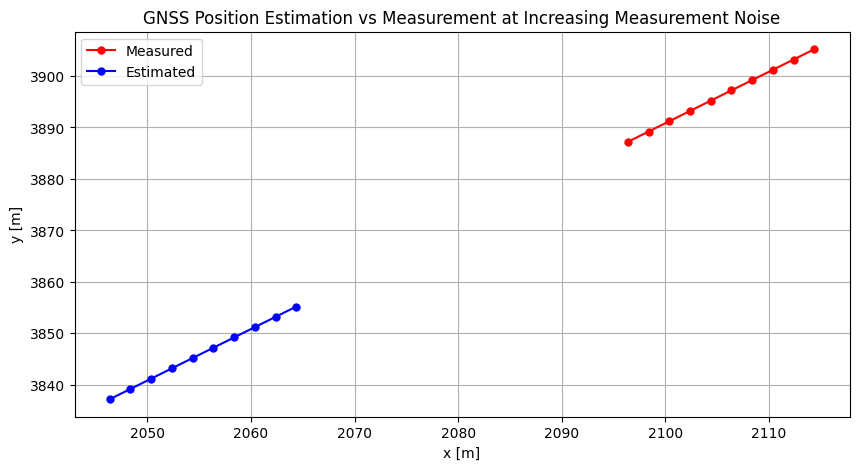

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(measured_pos[:, 0], measured_pos[:, 1], '-ro', markersize=5, label='Measured')
plt.plot(estimated_pos[:, 0], estimated_pos[:, 1], '-bo', markersize=5, label='Estimated')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('GNSS Position Estimation vs Measurement at Increasing Measurement Noise') 
plt.legend()
plt.grid(True);

estimate = np.column_stack((data['x_estimate'], data['y_estimate']))
measurement = np.column_stack((data['x_meas'], data['y_meas']))
position_errors = np.sqrt(np.sum((measurement - estimate)**2, axis=1))
mean_error = np.mean(position_errors)
std_error = np.std(position_errors)

print(f"Mean position error: {mean_error:.2f} m")
print(f"Standard deviation of position error: {std_error:.4f} m")
